In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil

# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

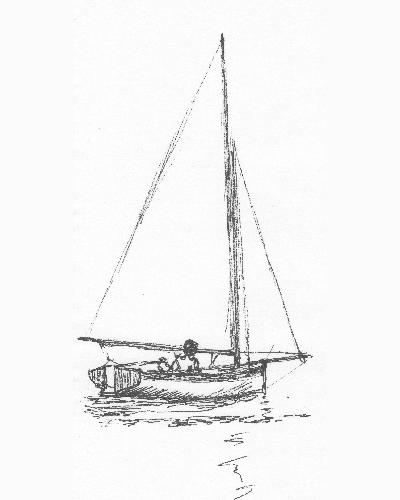

In [61]:
#read in one image as target (or y)
y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
#show image from array
Image.fromarray(y)

In [62]:
y.shape

(500, 400)

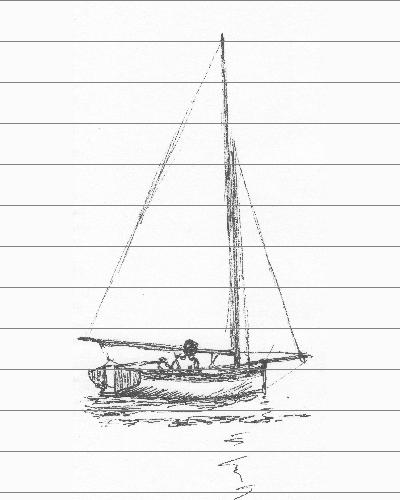

In [63]:
#2. create lines on target image

X = np.array(y)
#[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
#show new image from array
Image.fromarray(X)


In [64]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0002.jpg'))

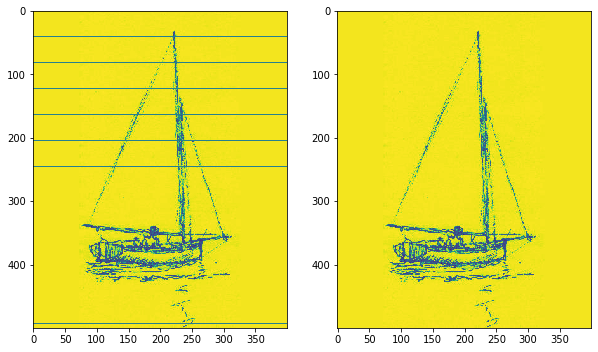

In [65]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
[ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [66]:
#reshape to fit into model
X = X.reshape(*X.shape,1)
X.shape

(500, 400, 1)

In [67]:
#3.build the model

model = Sequential()
model.add(Input(X.shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 1, kernel_size=(3,3), activation='linear', padding='same'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 498, 398, 32)      320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 496, 396, 32)      9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 494, 394, 32)      9248      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 496, 396, 32)      9248      
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 498, 398, 32)      9248      
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 500, 400, 32)      9248      
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 500, 400, 1)      

In [68]:
#4 compile your model

model.compile(loss = 'mse', optimizer = 'adam')


In [71]:
#5 set up tensorboard

# what does this function do Jamie? 
# def get_tboard_logdir():
#         import time
#         run_id = time.strftime("run_%Y_%m_%d-%H_%M")
#         return os.path.join(root_dir, run_id)
#tensorboard = TensorBoard(log_dir=run_tboard_dir, histogram_freq=2, batch_size=ba
checkpoint_filepath = './tmp/checkpoint'
tensorboard = TensorBoard(log_dir="./logs",
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_cp = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)


In [72]:


model.fit(x=np.array([X]), y=np.array([y]), epochs = 50, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])

Epoch 1/50
1/1 [==============================] - 0s 15ms/step - loss: 60837.1133
Epoch 2/50
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 10ms/step - loss: 51532.4688
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 42371.8281
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 28441.7832
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 11268.9697
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 1555.4368
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 18820.7246
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 10947.8467
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 2466.9937
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 1629.3457
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 4366.1250
Epoch 12/50
1/1 [====================

1/1 [==============================] - 0s 3ms/step - loss: 1270.8688
Epoch 25/50
1/1 [==============================] - 0s 3ms/step - loss: 1446.3624
Epoch 26/50
1/1 [==============================] - 0s 6ms/step - loss: 1054.3789
Epoch 27/50
1/1 [==============================] - 0s 4ms/step - loss: 861.4179
Epoch 28/50
1/1 [==============================] - 0s 9ms/step - loss: 1014.0100
Epoch 29/50
1/1 [==============================] - 0s 4ms/step - loss: 1098.3890
Epoch 30/50
1/1 [==============================] - 0s 4ms/step - loss: 889.9918
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 761.8951
Epoch 32/50
1/1 [==============================] - 0s 4ms/step - loss: 876.5209
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 794.2443
Epoch 34/50
1/1 [==============================] - 0s 3ms/step - loss: 683.6322
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 692.2545
Epoch 36/50
1/1 [==============================

1/1 [==============================] - 0s 3ms/step - loss: 458.1742
Epoch 49/50
1/1 [==============================] - 0s 3ms/step - loss: 439.2968
Epoch 50/50
1/1 [==============================] - 0s 3ms/step - loss: 438.0328


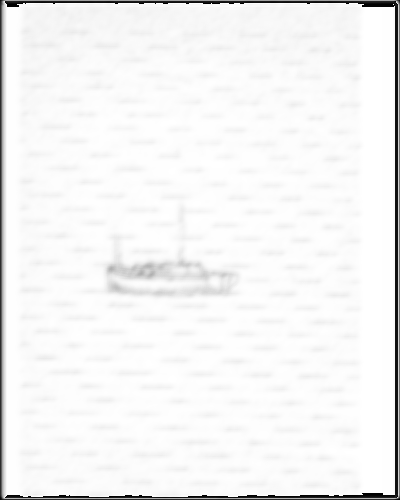

In [58]:
# result = model.predict(np.array([X]))
result = model.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [34]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
